In [3]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=100
duration = 1000
nproc=60
L=cbrt(100)
Ca=5.
Cb=1.
k0= 0.1
method='multiprocessing'

def write(name,obs):
    f=open(name,'w')
    data = np.array(obs.data()).T
    np.savetxt(name,np.column_stack([data[0],data[1]]),delimiter=',',fmt='%s')
    f.close()        
    print('saving into',name)        
    e=open(name+'_err','w')        
    err = np.array(obs.error()).T        
    np.savetxt(name+'_err',np.column_stack([err[0],err[1]]),delimiter=',',fmt='%s')
    e.close()
    print('saving into',name+'_err')

def singlerun(rm,D,solver,intrinsic=False,simrun=1):  
    K=int(L/2/rm)
    print(solver,'K',K)
    V = L**3 
    Nb=100
    solver = ('meso', Integer3(K,K,K))        
    keff = k0/Ca/Cb

    with species_attributes():
        A | {'D': D}
        B | {'D': D}

    with reaction_rules():
        ~A > A | k0
        A + B >B | (ka if intrinsic else keff)
        #A > ~A | keff
    m = get_model()
    print('rm={:.3},D={:.3}'.format(rm,D))
    print('kon={:.3},keff={:.3},V={:.3}'.format(k0,keff,V))
    if simrun >1    :
        obs=ensemble.ensemble_simulations(duration,n=simrun, y0={'B':Nb},model=m, solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
    else:
        obs=run_simulation(duration,model=m,y0={'B':Nb},return_type='observer',species_list=['A'],solver=solver,volume=ones()*L)
    data = np.array(obs.data()).T
    print('mean [A]',np.mean(data[1][50:])/V)   
    write('/home/chew/outputdata/sturrock_bd_meso_rm{:.3}_D{:.3}_L{:.3}'.format(rm,D,L),obs)
    return obs

obs=singlerun(0.5,0.1,'meso',False,simrun)   

    

meso K 4
rm=0.5,D=0.1
kon=0.1,keff=0.02,V=1e+02
mean [A] 5.07888823529
saving into /home/chew/outputdata/sturrock_bd_meso_rm0.5_D0.1_L4.64
saving into /home/chew/outputdata/sturrock_bd_meso_rm0.5_D0.1_L4.64_err


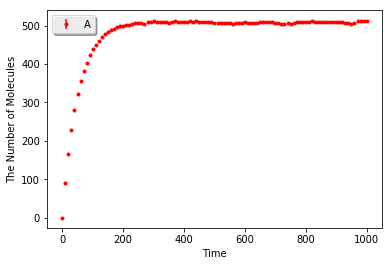

In [4]:
#viz.plot_number_observer(obs4,'r.',obs2,'g.',obs3,'k-',obs5,'y-',obs6,'c-')
viz.plot_number_observer(obs,'r.')

In [12]:
(6*0.1/0.02)**0.5#upper length scale

5.477225575051661